<a href="https://colab.research.google.com/github/brunocesarlopes23/projetcs-course-ml-cidamo/blob/project1/taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Primeiro Desafio Kaggle competition do curso de Introdução a Machine Learnig
</b><p> Neste desafio foram disponibilizados dois arquivos csv, um com os dados para análise e treino do modelo, e outro para testar e aplicar o modelo. 
<p>O resultado será submetido à competição do Kaggle

# Modelo Previsão de Tarifa de Táxi 
Vamos trabalhar aqui com parte de um dataset disponibilizado pelo departamento de transportes da cidade de Chicago que pode ser visualizado em sua totalidade atualmente com cerca de 195 milhões de registros [nesse link](https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew).

Os dados tratam de corridas de taxi registrando basicamente, do ponto de vista geográfico, datas e localidades de partidas e chegadas e, pela perspectiva financeira, preços, custos extras, gorjetas e meio de pagamento.

In [ ]:
#import bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#import dataframe 
df_original=pd.read_csv('https://drive.google.com/u/0/uc?id=1g1Kg9Mi_eionbjIsBhRqqmhoLHEhmred&export=download', sep=',')

In [ ]:
#Verifycation data type and possíveis missing
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unique_key              30000 non-null  object 
 1   taxi_id                 29998 non-null  object 
 2   trip_start_timestamp    30000 non-null  object 
 3   trip_end_timestamp      29996 non-null  object 
 4   trip_seconds            29805 non-null  float64
 5   trip_miles              30000 non-null  float64
 6   pickup_census_tract     19663 non-null  float64
 7   dropoff_census_tract    19559 non-null  float64
 8   pickup_community_area   26445 non-null  float64
 9   dropoff_community_area  25919 non-null  float64
 10  fare                    29999 non-null  float64
 11  tips                    29999 non-null  float64
 12  tolls                   24933 non-null  float64
 13  extras                  29999 non-null  float64
 14  trip_total              29999 non-null

In [ ]:
#count missing
df_original.isnull().sum().sort_values(ascending=True)

unique_key                    0
payment_type                  0
trip_miles                    0
ride_date                     0
trip_start_timestamp          0
extras                        1
trip_total                    1
fare                          1
tips                          1
taxi_id                       2
trip_end_timestamp            4
trip_seconds                195
pickup_latitude            3551
pickup_longitude           3551
pickup_location            3551
pickup_community_area      3555
dropoff_location           3993
dropoff_latitude           3993
dropoff_longitude          3993
dropoff_community_area     4081
tolls                      5067
company                    5171
pickup_census_tract       10337
dropoff_census_tract      10441
dtype: int64

##1ª Parte - Exploração Inicial sem missing
Neste parte, delet de dados missing e algumas explorações

In [ ]:
#Drop missing
df_nonan=df_original.dropna()
df_nonan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12986 entries, 0 to 29998
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unique_key              12986 non-null  object 
 1   taxi_id                 12986 non-null  object 
 2   trip_start_timestamp    12986 non-null  object 
 3   trip_end_timestamp      12986 non-null  object 
 4   trip_seconds            12986 non-null  float64
 5   trip_miles              12986 non-null  float64
 6   pickup_census_tract     12986 non-null  float64
 7   dropoff_census_tract    12986 non-null  float64
 8   pickup_community_area   12986 non-null  float64
 9   dropoff_community_area  12986 non-null  float64
 10  fare                    12986 non-null  float64
 11  tips                    12986 non-null  float64
 12  tolls                   12986 non-null  float64
 13  extras                  12986 non-null  float64
 14  trip_total              12986 non-null

<p>Before: number of rows was 30000</p>
<p>After: number of rows is  12986 </p> <p>Only <b>43% of original sample</b></p>


### Plots and Analisys

<p>Our goal is to predict the fare, so let's look at it and its relationships</p>
<p><b>Potential rate influencers:</b></p>
'trip seconds','trip miles','company','fare','trip start timestamp','tips','pickup_community_area','trip_total','extras','tolls'


In [ ]:
df_nonan.reset_index(inplace=True)

In [ ]:
#Split time and data
data_time=df_nonan.trip_start_timestamp.str.split(' ',expand=True)
data_time.rename({0:'start_trip_data',1:'start_trip_time'},axis=1,inplace=True)

#Insert new columns - start_trip_data and start_trip_time
df_nonan.insert(3,'start_trip_data',data_time['start_trip_data'])
df_nonan.insert(4,'start_trip_time',data_time['start_trip_time'])

#drop old column - trip_start_timestamp
df_nonan.drop(['trip_start_timestamp'],axis=1,inplace=True)
df_nonan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12986 entries, 0 to 12985
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   12986 non-null  int64  
 1   unique_key              12986 non-null  object 
 2   taxi_id                 12986 non-null  object 
 3   start_trip_data         12986 non-null  object 
 4   start_trip_time         12986 non-null  object 
 5   trip_end_timestamp      12986 non-null  object 
 6   trip_seconds            12986 non-null  float64
 7   trip_miles              12986 non-null  float64
 8   pickup_census_tract     12986 non-null  float64
 9   dropoff_census_tract    12986 non-null  float64
 10  pickup_community_area   12986 non-null  float64
 11  dropoff_community_area  12986 non-null  float64
 12  fare                    12986 non-null  float64
 13  tips                    12986 non-null  float64
 14  tolls                   12986 non-null

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#Name Day 
dataname=[]
for i in range(len(df_nonan)):
  data=pd.Timestamp(df_nonan['start_trip_data'][i])
  dataname.append(data.weekday())

#Substituition in start_trup_data
df_nonan['start_trip_data']=(dataname)
print('0:Monday\n1:Tuesday\n2:Wednesday\n3:Thursday\n4:Friday\n5:Saturday\n6:Sunday')
df_nonan['start_trip_data']

0:Monday
1:Tuesday
2:Wednesday
3:Thursday
4:Friday
5:Saturday
6:Sunday


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        6
1        5
2        5
3        0
4        2
        ..
12981    4
12982    4
12983    1
12984    2
12985    2
Name: start_trip_data, Length: 12986, dtype: int64

In [ ]:
#columns of analisys
columns=['trip_seconds','trip_miles','company','fare','start_trip_data','start_trip_time','tips','pickup_community_area','trip_total','extras','tolls']

In [ ]:
#vamos verificar como o horário influencia na  fare
#vamos dividir as horad do dia em 4 grupos: 0=[0,6),1=[6,12),2=[12,18),3=[18,24)
for i in range(len(df_nonan)):
  a=int(df_nonan['start_trip_time'][i][0:2])
  if a in [0,1,2,3,4,5]:
    df_nonan['start_trip_time'][i]=0
  elif a in [6,7,8,9,10,11]:
    df_nonan['start_trip_time'][i]=1
  elif a in [12,13,14,15,16,17]:
    df_nonan['start_trip_time'][i]=2
  else:
    df_nonan['start_trip_time'][i]=3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarn

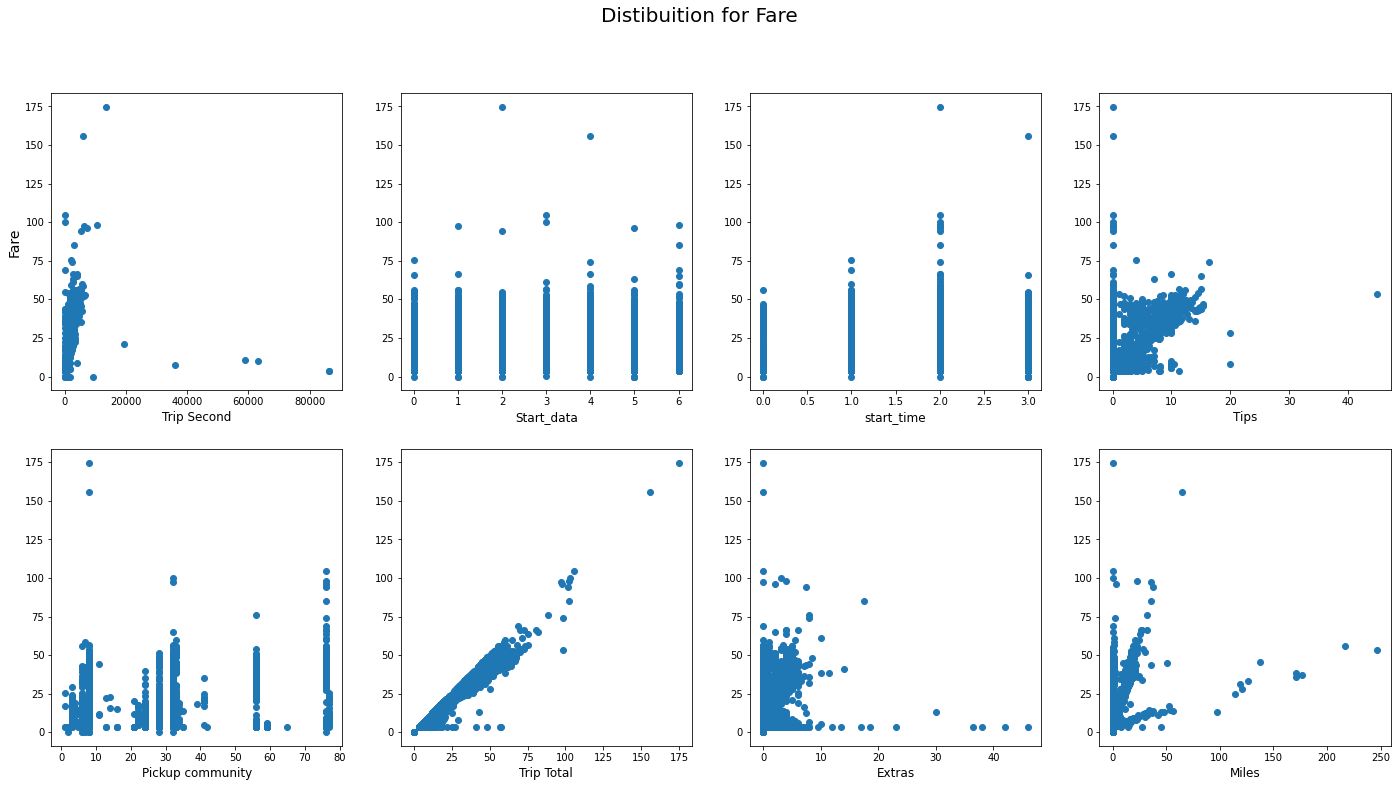

In [ ]:
fig, ax = plt.subplots(2,4,figsize=(24, 12),squeeze=True)
ax[0][0].scatter(df_nonan.trip_seconds,df_nonan.fare)
ax[0][0].set_xlabel('Trip Second',size=12)
ax[0][0].set_ylabel('Fare',size=14)
ax[0][1].scatter(df_nonan.start_trip_data,df_nonan.fare,)
ax[0][1].set_xlabel('Start_data',size=12)
ax[0][2].scatter(df_nonan.start_trip_time,df_nonan.fare,)
ax[0][2].set_xlabel('start_time',size=12)
ax[0][3].scatter(df_nonan.tips,df_nonan.fare,)
ax[0][3].set_xlabel('Tips',size=12)
ax[1][0].scatter(df_nonan.pickup_community_area,df_nonan.fare)
ax[1][0].set_xlabel('Pickup community',size=12)
ax[1][1].scatter(df_nonan.trip_total,df_nonan.fare,)
ax[1][1].set_xlabel('Trip Total',size=12)
ax[1][2].scatter(df_nonan.extras,df_nonan.fare,)
ax[1][2].set_xlabel('Extras',size=12)
ax[1][3].scatter(df_nonan.trip_miles,df_nonan.fare,)
ax[1][3].set_xlabel('Miles',size=12)
plt.suptitle('Distibuition for Fare',fontsize=20)
plt.show()

Text(0.5, 1.0, 'Median fare for company')

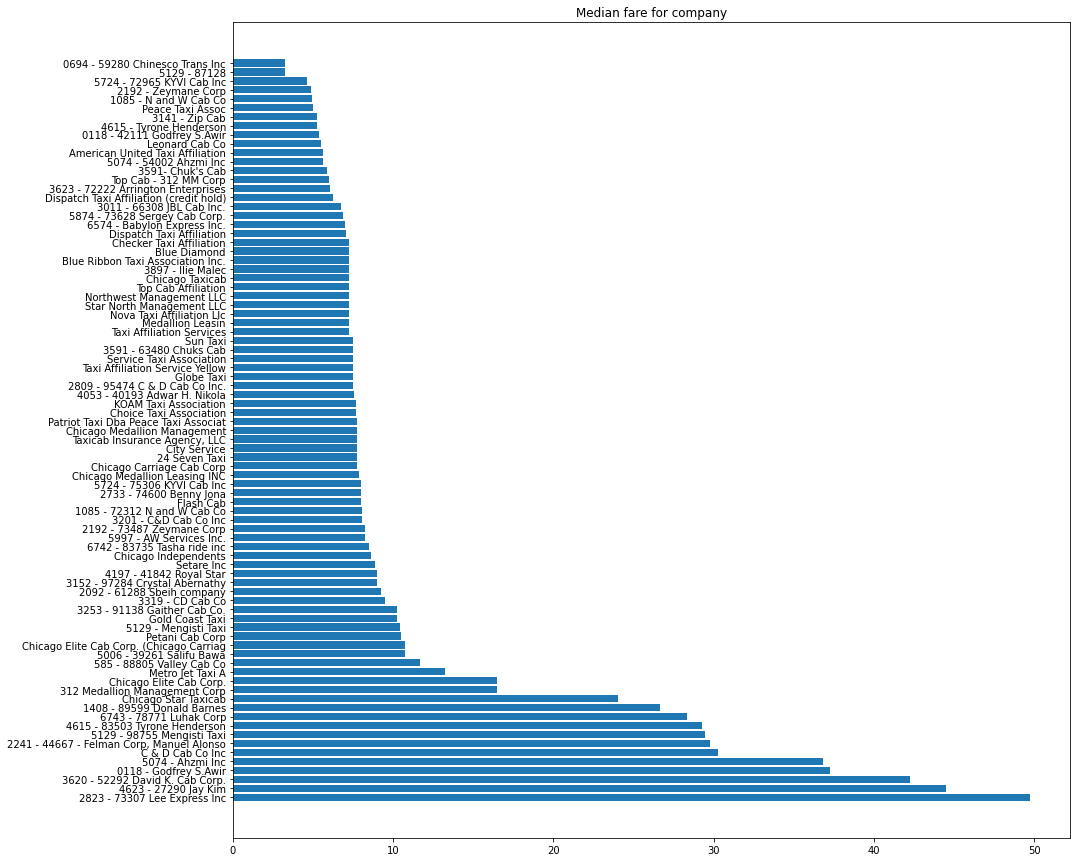

In [ ]:
#Fare median for company
fare_median_for_company=df_nonan[['fare','company']].groupby(df_nonan.company).median().sort_values('fare',ascending=False)
plt.figure(figsize=(15,15))
plt.barh(fare_median_for_company['fare'].index,fare_median_for_company['fare'].values)
plt.title('Median fare for company')

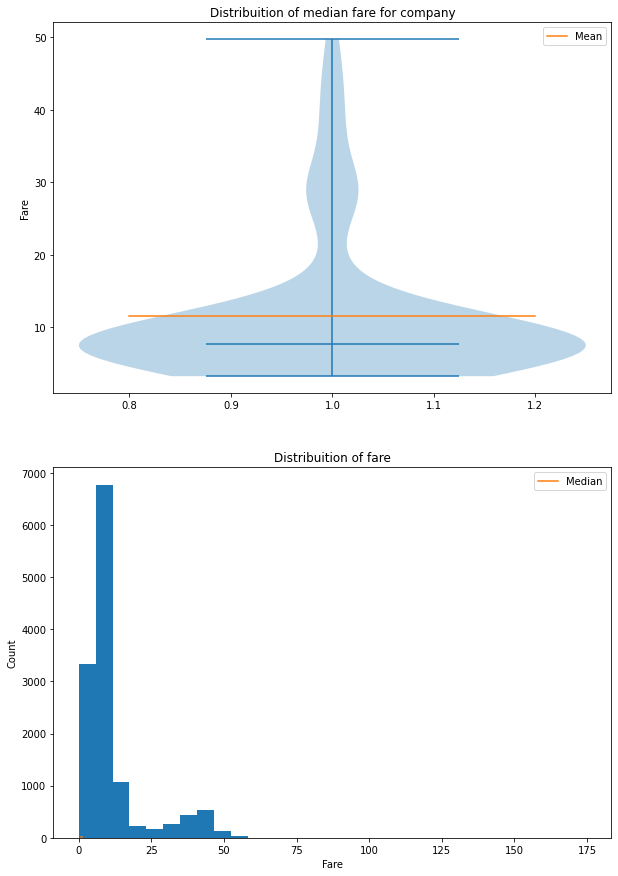

Median Fare for company:
 [49.75  44.5   42.25  37.25  36.85  30.25  29.75  29.45  29.25  28.35
 26.65  24.    16.5   16.45  13.25  11.65  10.75  10.75  10.5   10.45
 10.25  10.25   9.5    9.25   9.     8.975  8.875  8.625  8.5    8.25
  8.225  8.05   8.05   8.     8.     8.     7.85   7.75   7.75   7.75
  7.75   7.75   7.75   7.65   7.65   7.575  7.5    7.5    7.5    7.5
  7.5    7.5    7.25   7.25   7.25   7.25   7.25   7.25   7.25   7.25
  7.25   7.25   7.25   7.05   7.     6.85   6.75   6.25   6.05   6.
  5.85   5.625  5.625  5.5    5.375  5.25   5.25   5.     4.95   4.85
  4.65   3.25   3.25 ]
Median: 7.75
Mean:  11.575301204819278
Desvio Padrão:  9.912421845189323


In [ ]:
#Distribuition fare
fig,axs = plt.subplots(2,figsize=(10,15))

axs[0].violinplot(fare_median_for_company['fare'].values,showmedians=True);
axs[0].plot([0.8,1.2],[fare_median_for_company.mean(),fare_median_for_company.mean()],label='Mean')
axs[0].set_ylabel('Fare')
axs[0].legend()
axs[0].set_title('Distribuition of median fare for company')

axs[1].hist(df_nonan['fare'].values,bins=30);
axs[1].plot([0.8,1.2],[df_nonan['fare'].mean(),df_nonan['fare'].mean()],label="Median")
axs[1].set_xlabel('Fare')
axs[1].set_ylabel('Count')
axs[1].legend()
axs[1].set_title('Distribuition of fare')

plt.show(),
print('Median Fare for company:\n',fare_median_for_company['fare'].values)
print('Median:' ,fare_median_for_company['fare'].values[42])
print('Mean: ',fare_median_for_company['fare'].values.mean())
print('Desvio Padrão: ',fare_median_for_company['fare'].values.std())

Constatações:
<p>1) trip_second e trip total vemos claramente uma tendência linear com a tarifa
<p>2) tips e extras parecem ter alguma relação intermediária com a tarifa
<p>3) vemos também que há muitos tips e extras com valor 0
<p>4) extras a partir de 20 a tarifa é 0 
<p>5) Miles parece ter 3 diferentes tendencias lineares com a tarifa
<p>6) Valor mediano da tarifa 7.75
<p>7) Os horários não apresentam muita influencia na tarifa
<p>8) As datas não apresentam muita influência na tarifa
<p>_____
<p>Portanto vamos tirar do modelo date e time
<p>_____
<p>Vamos utilizar: trip_total , extras , tips e tolls para prever a tarifa <b>fare</b> da seguinte forma:
<p> fare=(trip_total) - (extras) - (tips) - (tolls)
<p>Vamos utilizar trip_seconds e trip_miles para prever missing das variáveis da equação acima.

In [ ]:
#Verificando valores de Tolls
df_nonan.loc[(df_nonan.tolls!=0),columns]

,trip_seconds,trip_miles,company,fare,start_trip_data,start_trip_time,tips,pickup_community_area,trip_total,extras,tolls


Preencheremos os NAN de Tolls com zero


## 2ª Parte - Ajustando para o Modelo

In [ ]:
#columns definition
X=['trip_seconds','trip_miles','trip_total','tips','extras','tolls']
y=['fare']

In [ ]:
df_original[X].isnull().sum()

trip_seconds     195
trip_miles         0
trip_total         1
tips               1
extras             1
tolls           5067
dtype: int64

In [ ]:
df_original[X].describe()

,trip_seconds,trip_miles,trip_total,tips,extras,tolls
count,29805.000000,30000.000000,29999.000000,29999.000000,29999.000000,24933.000000
mean,798.112833,3.237427,15.191000,1.402873,0.867869,0.001043
std,1507.877805,6.297811,15.147028,2.640751,2.742169,0.055194
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,310.000000,0.200000,7.000000,0.000000,0.000000,0.000000
50%,540.000000,1.190000,9.650000,0.000000,0.000000,0.000000
75%,960.000000,3.000000,15.450000,2.000000,1.000000,0.000000
max,86386.000000,247.000000,274.350000,63.000000,99.500000,4.000000


Verificamos a presença de outliers

### Tratando os Outliers

Definition: Outlier > Q3+1.5*(Q3-Q1)

In [ ]:
#Create df no outliers
def df_drop_out(x):
  
  '''x é uma lista com os nomes das colunas a terem seus outliers tratados
  Irá mostrar Boxplot de cada uma das colunas tratadas e
  return será um df sem os outliers das colunas
  exemplo: df_drop_out(['col1','col2','col3'])'''

  indice=set(df_original.index) #todos os indices
  
  for i in range(len(x)): #iterações limitado ao tamanho da lista de entrada
    
    #Selection Quartile
    quartil=np.percentile(df_original[x[i]].dropna(),[25,75])
  
    #Outlier
    out=quartil[1]+(1.5*(quartil[1]-quartil[0]))
  
    #Drop Outliers
    df_drop_out=df_original[X].drop(df_original.loc[(df_original[x[i]]>out)].index)

    #Boxplot
    plt.boxplot(df_drop_out[x[i]].dropna()),
    plt.title(str('Boxplot {0}').format(x[i]))
    plt.ylabel(x[i]),
    plt.show()

    #Seleção dos indices sem outlier
    a=set(df_drop_out[x[i]].index) #conjunto de indice sem outlier da interação
    indice=indice & a #conjunto de indices sem outlier interseção com conjunto de indices sem outlier da próxima interação. No final ficaram apenas os indices que não possuem outlier
  
  return df_original[X].loc[indice]

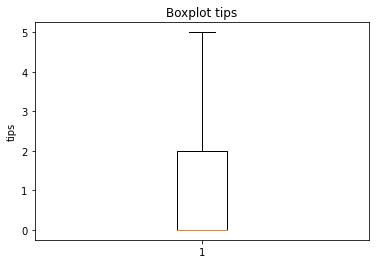

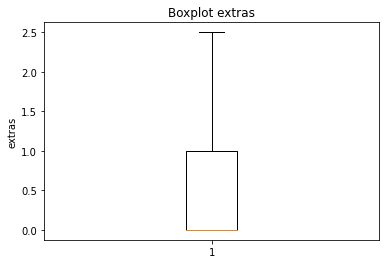

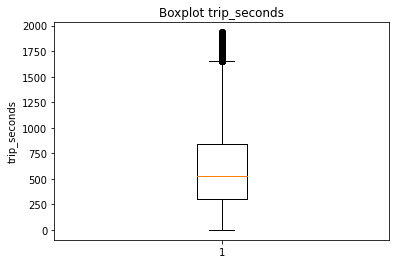

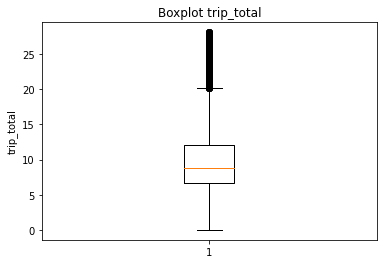

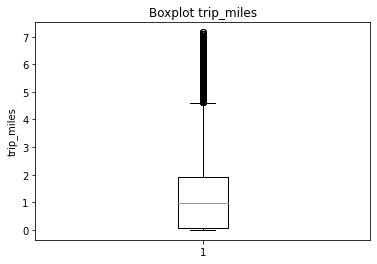

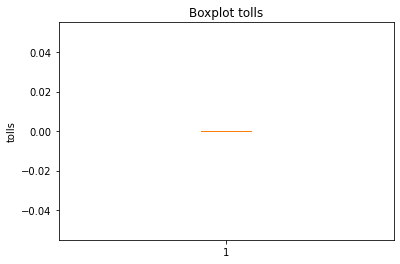

In [ ]:
df_no_outlier=df_drop_out(['tips','extras','trip_seconds','trip_total','trip_miles','tolls'])

In [ ]:
df_no_outlier.describe()

,trip_seconds,trip_miles,trip_total,tips,extras,tolls
count,24257.000000,24414.000000,24413.000000,24413.000000,24413.000000,20275.0
mean,530.338006,1.398565,9.423397,0.772761,0.368837,0.0
std,343.964218,1.523689,4.204896,1.169197,0.607615,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,300.000000,0.100000,6.500000,0.000000,0.000000,0.0
50%,480.000000,1.000000,8.500000,0.000000,0.000000,0.0
75%,720.000000,1.940000,11.500000,2.000000,1.000000,0.0
max,1932.000000,7.160000,28.100000,5.000000,2.500000,0.0


### Tratando missing

In [ ]:
df_original[X].isnull().sum()

trip_seconds     195
trip_miles         0
trip_total         1
tips               1
extras             1
tolls           5067
dtype: int64

De 30 mil dados apenas 195 do trip_seconds são nulos, ou seja <b> 0,65%</b>.
<p>A <b>exclusão destes dados não afetaria nosso modelo</b>.

In [ ]:
#Exclusão nan of trip_seconds
df_no_nan_trip_seconds=df_original[X].loc[(df_original['trip_seconds'].isnull()==False)]
df_no_nan_trip_seconds.isnull().sum()

trip_seconds       0
trip_miles         0
trip_total         1
tips               1
extras             1
tolls           5067
dtype: int64

In [ ]:
#Exclusão nan of trip_total
df_no_nan_=df_no_nan_trip_seconds[X].loc[(df_no_nan_trip_seconds['trip_total'].isnull()==False)]
df_no_nan_.isnull().sum()

trip_seconds       0
trip_miles         0
trip_total         0
tips               0
extras             0
tolls           5066
dtype: int64

In [ ]:
#Zero for Nan in tolls
df_no_nan_=df_no_nan_.copy()
df_no_nan_.loc[(df_no_nan_['tolls'].isnull()==True),['tolls']]=0
df_no_nan_.isnull().sum()

trip_seconds    0
trip_miles      0
trip_total      0
tips            0
extras          0
tolls           0
dtype: int64

##3ª Parte - Aplicação Modelo

In [ ]:
# Modelo: fare=trip_total+extras+tips+tolls
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#definindo as features de entrada do modelo e o target
x=df_no_nan_[['trip_total','extras','tips','tolls']]
y=df_original.iloc[df_no_nan_.index]
#Separando em treino e teste
x_train,x_test,y_train,y_test=train_test_split(x, y, train_size=0.7, random_state=0)

#Modelo e sua aplicação
fare=[]
for i in x_test.index:
  soma=x_test['trip_total'][i]-(x_test['extras'][i]+x_test['tips'][i]+x_test['tolls'][i])
  fare.append(soma)

#Avaliação do Modelo pelo R2
r2_score(y_test.fare,fare)

0.9998343748423391

In [ ]:
#Definidndo função de comparação de modelos lineares

def ApplyesKFold(x_axis, y_axis):
  # Linear Models.
  from sklearn.linear_model import LinearRegression
  from sklearn.linear_model import ElasticNet
  from sklearn.linear_model import Ridge
  from sklearn.linear_model import Lasso

  # Cross-Validation models.
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import KFold

  # KFold settings.
  kfold  = KFold(n_splits=10, shuffle=True) # shuffle=True, Shuffle (embaralhar) the data.

  # Axis
  x = x_axis
  y = y_axis

  # Models instances.
  linearRegression = LinearRegression()
  elasticNet       = ElasticNet()
  ridge            = Ridge()
  lasso            = Lasso()

  # Applyes KFold to models.
  linearRegression_result = cross_val_score(linearRegression, x, y,cv = kfold)
  elasticNet_result       = cross_val_score(elasticNet, x, y, cv = kfold)
  ridge_result            = cross_val_score(ridge, x, y, cv = kfold)
  lasso_result            = cross_val_score(lasso, x, y, cv = kfold)

  # Creates a dictionary to store Linear Models.
  dic_models = {
    "LinearRegression": linearRegression_result.mean(),
    "ElasticNet": elasticNet_result.mean(),
    "Ridge": ridge_result.mean(),
    "Lasso": lasso_result.mean()
  }
  # Select the best model.
  bestModel = max(dic_models, key=dic_models.get)

  print("Linear Regression Mean (R^2): {0}\nElastic Net Mean (R^2): {1}\nRidge Mean (R^2): {2}\nLasso Mean (R^2): {3}".format(linearRegression_result.mean(), elasticNet_result.mean(), ridge_result.mean(), lasso_result.mean()))
  print("The best model is: {0} with value: {1}".format(bestModel, dic_models[bestModel]))


In [ ]:
ApplyesKFold(x,y)

Linear Regression Mean (R^2): 0.9998654678818015
Elastic Net Mean (R^2): 0.9966825295409732
Ridge Mean (R^2): 0.9998659401556813
Lasso Mean (R^2): 0.9959122309009663
The best model is: Ridge with value: 0.9998659401556813


In [ ]:
#Treinando Modelos

# Cross-Validation models.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# KFold settings.
kfold  = KFold(n_splits=10, shuffle=True) # shuffle=True, Shuffle (embaralhar) the data.
# Axis
x = x_axis
y = y_axis
# Models instances.
linearRegression = LinearRegression()
elasticNet       = ElasticNet()
ridge            = Ridge()
lasso            = Lasso()

# Applyes KFold to models.
linearRegression_result = cross_val_score(linearRegression, x, y,cv = kfold)
elasticNet_result       = cross_val_score(elasticNet, x, y, cv = kfold)
ridge_result            = cross_val_score(ridge, x, y, cv = kfold)
lasso_result            = cross_val_score(lasso, x, y, cv = kfold)

## 4ª parte - Aplicando modelo nos dados testes do desafio

In [ ]:
#Vamos testar no modelo teste
taxi_submission=pd.read_csv('https://drive.google.com/u/0/uc?id=1b7TW5UcXLJDuU4tBIi1rNbvM4Zp0HVYM&export=download', sep=',')

In [ ]:
taxi_submission.columns

Index(['unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
       'trip_seconds', 'trip_miles', 'pickup_census_tract',
       'dropoff_census_tract', 'pickup_community_area',
       'dropoff_community_area', 'tips', 'tolls', 'extras', 'trip_total',
       'payment_type', 'company', 'pickup_latitude', 'pickup_longitude',
       'pickup_location', 'dropoff_latitude', 'dropoff_longitude',
       'dropoff_location', 'ride_date'],
      dtype='object')

In [ ]:
#dados para teste
column=['trip_total','extras','tips','tolls']
taxi_teste=taxi_submission[column]

In [ ]:
#tratando dados do teste
taxi_teste.isnull().sum()

trip_total       1
extras           1
tips             1
tolls         3361
dtype: int64

In [ ]:
#Missing to zero in tolls
df_no_nan_teste=taxi_teste.copy()
df_no_nan_teste.loc[(df_no_nan_teste['tolls'].isnull()==True),['tolls']]=0
df_no_nan_teste.isnull().sum()

trip_total    1
extras        1
tips          1
tolls         0
dtype: int64

In [ ]:
#Missing to Median 
df_teste=df_no_nan_teste.copy()
for column in df_teste.columns:
    df_teste[column]=df_teste[column].fillna(taxi_teste[column].median())
df_teste.isnull().sum()


trip_total    0
extras        0
tips          0
tolls         0
dtype: int64

In [ ]:
# Aplicando Modelo: fare=trip_total+extras+tips+tolls
fare=[]
for i in df_teste.index:
  soma=df_teste['trip_total'][i]-(df_teste['extras'][i]+df_teste['tips'][i]+df_teste['tolls'][i])
  fare.append(soma)
taxi_chaves=pd.DataFrame(taxi_submission['unique_key'])#dataframe uniquekey
taxi_chaves.insert(1,'fare',fare)#concatenando dataframes
results_f=taxi_chaves.copy()

In [ ]:
#Aplicando Ridge
results_f=ridge.predict(df_teste) #testando valores
results_f=pd.DataFrame(results_f,columns=['fare']) #transformando em Dataframe
taxi_chaves=pd.DataFrame(taxi_submission['unique_key'])#dataframe uniquekey
results_f=pd.concat([taxi_chaves, results_f], axis=1)#concatenando dataframes
results_f

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,unique_key,fare
0,ab1adf76a077d31a82824264aed032f197423f5d,40.836178
1,d19b9b5131a749b6c8fee6661a84833421c1e25f,9.381671
2,f5a6afb4daedb37b82500baf34cf41adcf7ca167,7.623951
3,f06a3db639297271c4a1f5b3704d5c0790d62620,13.944353
4,3d9dd92332405f2649b746dda48c2f926477e358,9.425482
...,...,...
19995,bd399345026e933c8c9720433f3f7ef70ab2f6d3,6.023010
19996,32f21576e43a257fa1c4c624576a097a8ff5f640,75.237920
19997,2a66652862821235e5a24e9a6dc28e1663c41fcd,4.622658
19998,dbac35b3e6a4ac99f8c691aaf885abc2f43cb4ca,25.732711


In [ ]:
#Este Modelo não foi utilizado, pois teve desempenho infeior aos outros modelos
'''#Aplicando Regressão Linear
results_f=reg.predict(taxi_teste_sem_nulos) #testando valores
results_f=pd.DataFrame(results_f,columns=['fare']) #transformando em Dataframe
taxi_chaves=pd.DataFrame(taxi_submission['unique_key'])#dataframe uniquekey
results_f=pd.concat([taxi_chaves, results_f], axis=1)#concatenando dataframes
results_f'''

In [ ]:
#escrevendo csv.
results_f.to_csv('taxi_results01_submission.csv',index=False)